In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz

# Train on simple Sines

A very simple dataset, should be able to crush this. Sines all at 440 hz and 1.0 amplitude, but different phases.

We will try to train in around 30 minutes. At batches of 16 running at 2.35 it/s, we have 30*60=1800 seconds so 765 steps to complete over batches of 16 1s audios. This is around 200 minutes of audio to iterate over, so 20 epochs of 10 minutes each seems reasonable. That's around 40 steps per epoch, so 40*16=640 examples.

In [3]:
dry = True
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p = model.HParams(n_audio_chans=2)
X, X_test = datasets.Sines(640, 1, p, hz=440, amp=1.0), datasets.Sines(640, 3, p, hz=440, amp=1.0)
batch = datasets.to_tensor(X, 20)[1]

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, X, X_test, train.HParams(max_epochs=1, batch_size=16, num_workers=10, learning_rate=0.0021), None)

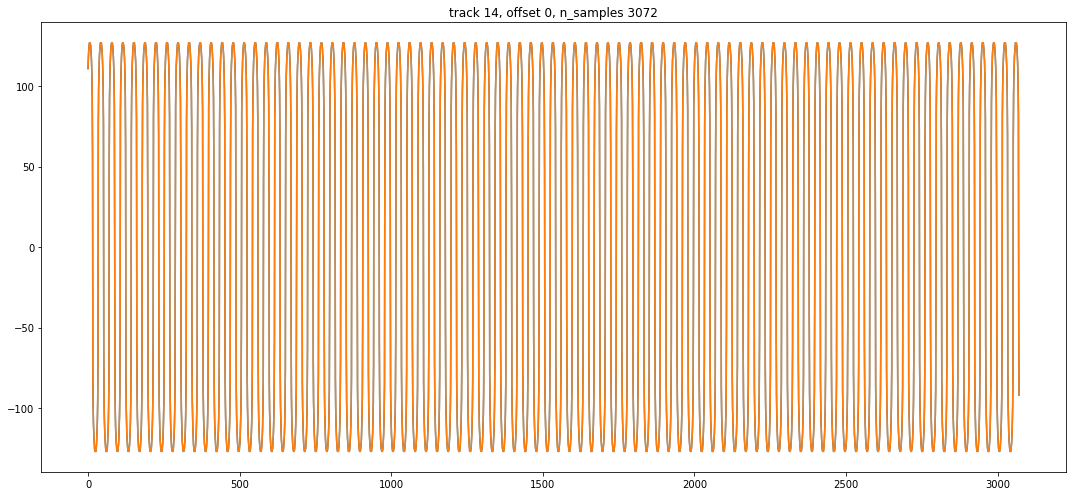

In [6]:
track_i = viz.plot_track(batch, n_samples=p.receptive_field_size())

In [7]:
ipd.Audio(audio.mu_expand(batch[track_i].numpy(), p), rate=p.sampling_rate)

In [8]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.
wandb: WARNING Symlinked 2 files into the W&B run directory, call wandb.save again to sync new files.
  0%|          | 0/40 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
1:39 loss 1.59746 lr 6.610553e-06: 100%|██████████| 40/40 [01:40<00:00,  2.51s/it]


In [9]:
_, track = sample.sample(m, decoder=utils.decode_nucleus(), n_samples=32000, batch_size=10)

3

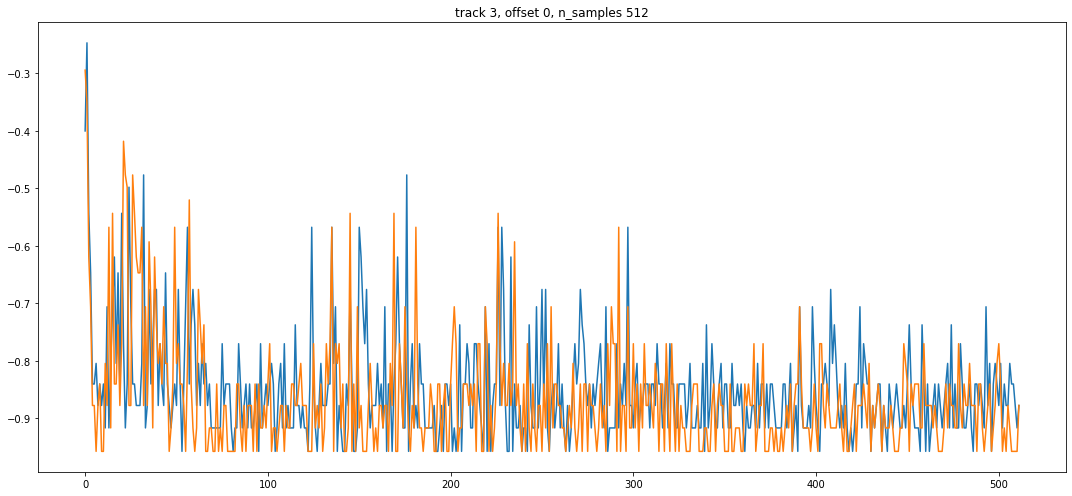

In [10]:
viz.plot_track(track, n_samples=p.receptive_field_size() // 6)

In [11]:
ipd.Audio(track[0], rate=p.sampling_rate)